<a href="https://colab.research.google.com/github/Mizoroki-Heck/LearnMLWorkshop/blob/main/transfusion/blood_donation_in_2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Recency (months) - Количество месяцев с момента последнего пожертвования конкретного донора   

Frequency (times) - Общее количество пожертвований, сделанных донором  

Monetary (c.c. blood) - Общий объем крови, сданной донором (кубические сантиметры)    

Time (months) - Количество месяцев с момента первой донации донора   

Whether he/she donated blood in March 2007 - Это двоичная переменная, которая показывает, сдавал ли донор кровь в марте 2007 г.

In [ ]:
data = pd.read_csv('/content/sample_data/transfusion.data.csv')
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
data.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [ ]:
data.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)

In [ ]:
percent = len(data[data['target']==0]) / len(data['target'])
percent * 100

76.20320855614973

In [ ]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


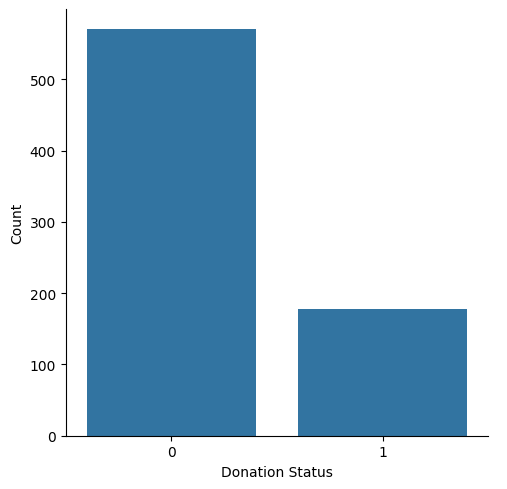

In [ ]:
sns.catplot(x = 'target', data = data, kind = 'count');
plt.xlabel('Donation Status')
plt.ylabel('Count')
plt.show()

Видим, что наибольшее количество не сдавших кровь у тех, кто сдавал небольшой объем крови за все время.    
И наибольшее число сдавших кровь в 2007 году, тоже у тех, кто сдавал не большой объем.

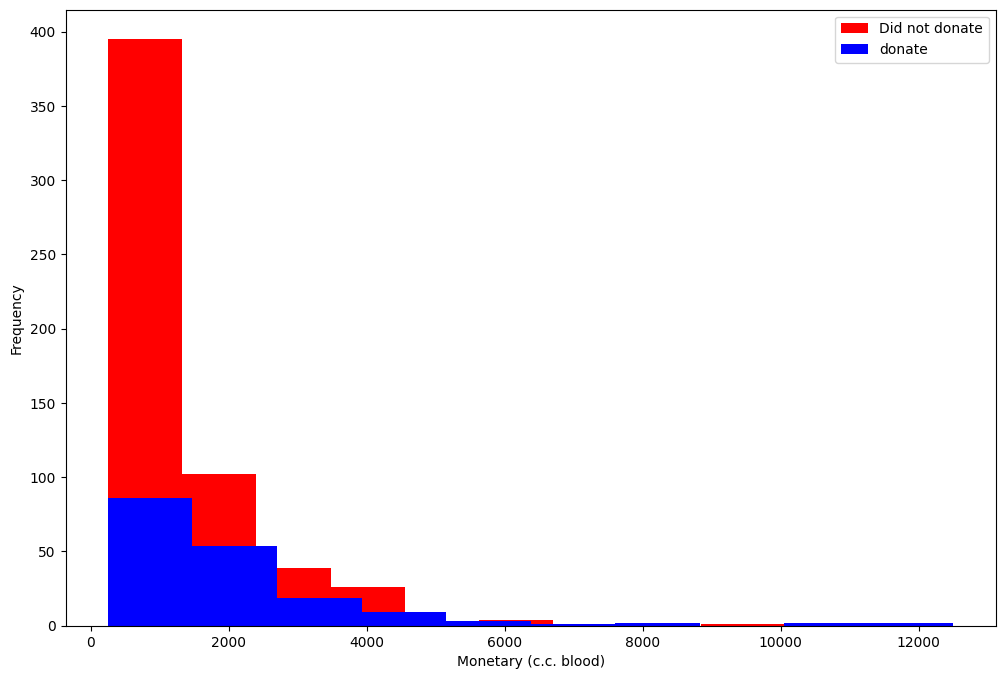

In [ ]:
plt.figure(figsize=(12,8))

plt.hist(x = data[data['target']==0]['Monetary (c.c. blood)'], label='Did not donate', color = 'Red')
plt.hist(x = data[data['target']==1]['Monetary (c.c. blood)'], label='donate', color = 'blue');

plt.xlabel('Monetary (c.c. blood)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

Такая же картина, с общим количеством пожертвований

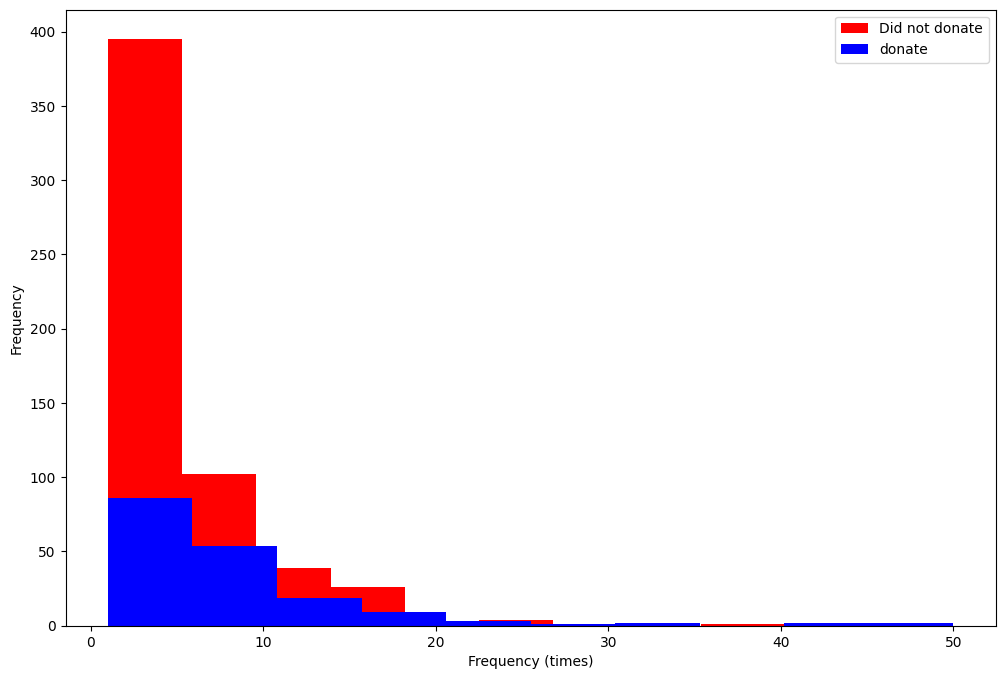

In [ ]:
plt.figure(figsize=(12,8))

plt.hist(x = data[data['target']==0]['Frequency (times)'], label='Did not donate', color = 'Red')
plt.hist(x = data[data['target']==1]['Frequency (times)'], label='donate', color = 'blue');

plt.xlabel('Frequency (times)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=data.target)

In [ ]:
X_train.var().round(3)

Recency (months)              64.468
Frequency (times)             34.166
Monetary (c.c. blood)    2135386.219
Time (months)                577.346
dtype: float64

Видно, что у Monetary, огромный разброс значений

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_copy = X_train
X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_copy = X_test
X_test_scaled = scaler.transform(X_test_copy)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_scaled, y_train)
predict = logreg.predict_proba(X_test_scaled)
logreg_auc_score = roc_auc_score(y_test, predict[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7927


Теперь попробую просто прологарифмировать Monetary

In [ ]:
X_train['Monetary_log'] = np.log1p(X_train['Monetary (c.c. blood)'])
X_test['Monetary_log'] = np.log1p(X_test['Monetary (c.c. blood)'])
X_train = X_train.drop('Monetary (c.c. blood)', axis=1)
X_test = X_test.drop('Monetary (c.c. blood)', axis=1)

In [ ]:
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train, y_train)
predict = logreg.predict_proba(X_test)
logreg_auc_score = roc_auc_score(y_test, predict[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7999


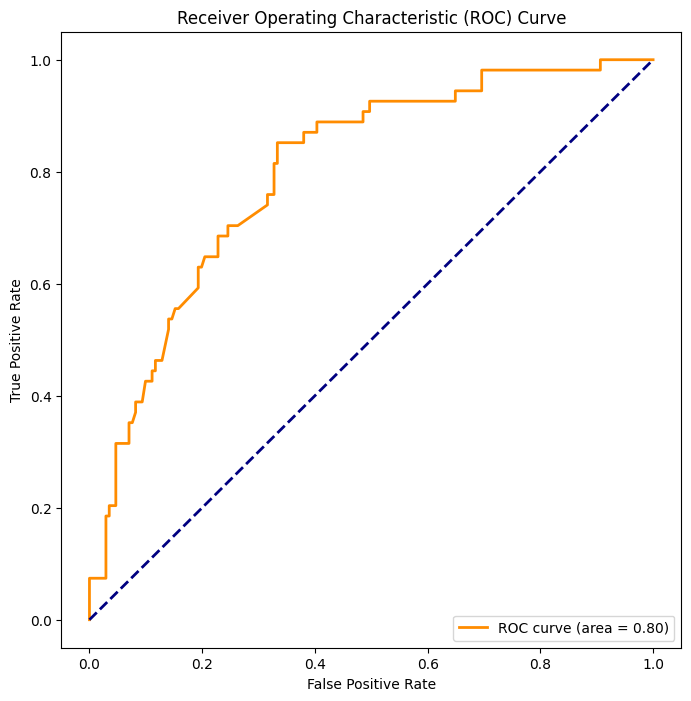

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, predict[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Модель имеет хорошую предсказательную способность. Значение AUC ROC окло 0.80.